In [62]:
#7.1

import pandas as pd
from sklearn.model_selection import train_test_split

tit_train = pd.read_csv("ed-titanic-training.csv", index_col=0)
tit_test = pd.read_csv("ed-titanic-test.csv", index_col=0)

tit_train.loc[tit_train['Age'] > 3, 'Age'] = 4
tit_test.loc[tit_test['Age'] > 3, 'Age'] = 4

tit_data_x = tit_train.drop('Survived', axis=1)
tit_data_y = tit_train['Survived']

tit_x_train, tit_x_test, tit_y_train, tit_y_test = train_test_split(tit_data_x, tit_data_y, train_size=0.75, random_state=49)

Ponownie przygotowujemy dane o pasażerach Tytanica na potrzeby kolejnego zadania. Używamy parametru `random_state` o takiej samej wartości, jak w notatniku do punktu 5 polecenia, aby uzyskać taki sam podział na zbiory treningowy i testowy, tak żeby porównanie było jak najbardziej miarodajne.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(
    RandomForestClassifier(),
    {
        'criterion': ['entropy'],
        'max_depth': [3],
        'min_samples_leaf': [1],
        'n_estimators': [50, 75, 100, 125, 150]
    },
    cv=10,
    scoring='accuracy'
)

search.fit(tit_data_x, tit_data_y)
print(search.best_estimator_.n_estimators)

100


Powtarzamy parametry klasyfikatora z punktu 5.10 i dodatkowo używamy walidacji krzyżowej do znalezienia optymalnej liczby drzew dla przeniesionych parametrów. Jak widzimy jest to liczba 100.

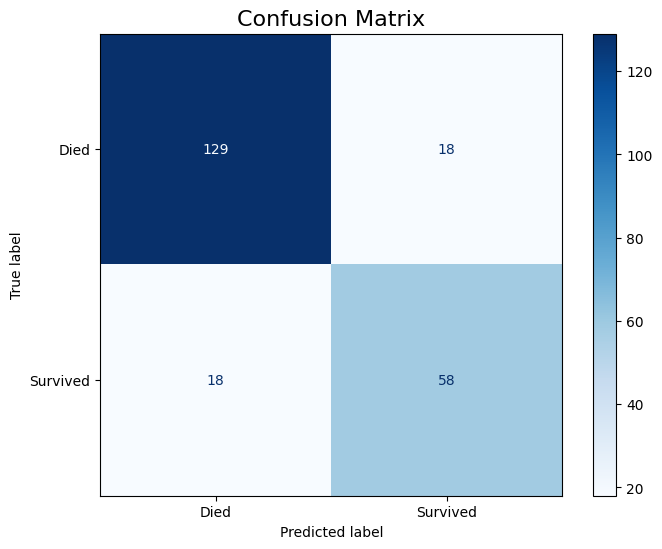

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

decision_tree = RandomForestClassifier(n_estimators=100, max_depth=3, criterion='entropy', min_samples_leaf=1)
decision_tree.fit(tit_x_train, tit_y_train)

tit_y_pred = decision_tree.predict(tit_x_test)
cm = confusion_matrix(tit_y_test, tit_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, diag = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=diag)
diag.set_title('Confusion Matrix', fontsize=16)
plt.show()

W porównaniu do 5.10, macierz rozbieżności wyszła nam niewiele gorsza, i tak zaklasyfikowaliśmy tylko dwa rekordy gorzej:
- o 1 mniej zmarłego poprawnie
- o 1 mniej ocalałego poprawnie

In [78]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(tit_y_test, tit_y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(tit_y_test, tit_y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(tit_y_test, tit_y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')

Accuracy: 0.839
F1-score: 0.763
Avg Precision: 0.839
Avg Recall: 0.839


Odzwierciedlają to również minimalnie gorsze powyższe parametry, lecz nie są one gorsze o więcej niż 1% w porównaniu z punktem 5.11.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

def find_best(data, target):
    comparison = GridSearchCV(
        RandomForestClassifier(),
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 10),
            'min_samples_leaf': [1, 5, 10, 15],
            'n_estimators': [50, 75, 100, 125, 150]
        },
        cv=10,
        scoring='accuracy'
    )

    comparison.fit(data, target)
    print(f'Best: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, min_samples_leaf:{comparison.best_estimator_.min_samples_leaf}, n_estimators:{comparison.best_estimator_.n_estimators}')

find_best(tit_data_x, tit_data_y)

Best: Gini/Entropy:entropy, max_depth:8, min_samples_leaf:5, n_estimators:50


Spróbujmy więc znaleźć metodą 10-krotnej walidacji krzyżowej optymale parametry dla nowego lasu losowego, a nie sugerujmy się parametrami drzewa z punktu 5.10, gdyż struktura tych klasyfikatorów jest kompletnie różna. Może wyznaczone na nowo parametry pozwolą uzyskać lepszą klasyfikację?

Parametry dla optymalnego klasyfikatora zostały wypisane powyżej, spróbujmy ich użyć do klasyfikacji

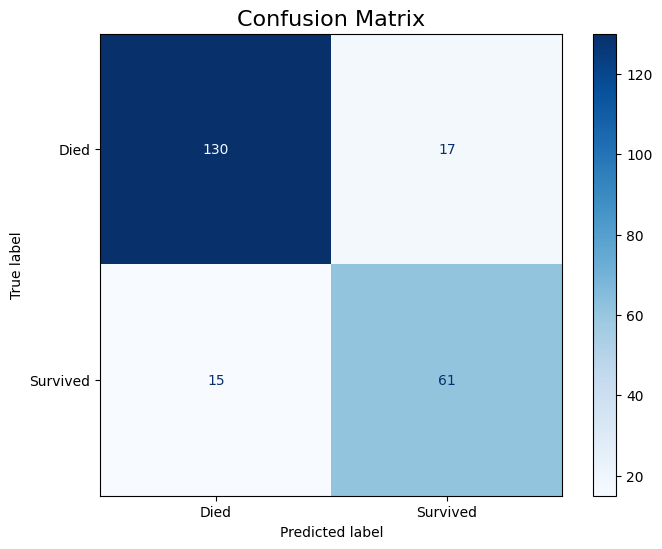

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

decision_tree = RandomForestClassifier(n_estimators=50, max_depth=8, criterion='entropy', min_samples_leaf=5)
decision_tree.fit(tit_x_train, tit_y_train)

tit_y_pred = decision_tree.predict(tit_x_test)
cm = confusion_matrix(tit_y_test, tit_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
fig, diag = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=diag)
diag.set_title('Confusion Matrix', fontsize=16)
plt.show()

Udało się, dla nowych parametrów macierz rozbieżności przyjmuje lepsze wartości, lecz jest to różnica minimalna:
- o 2 więcej poprawnie zaklasyfikowanych ocalałych.

In [86]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(tit_y_test, tit_y_pred)
print(f'Accuracy: {accuracy:.3f}')

f1_sc = f1_score(tit_y_test, tit_y_pred)
print(f'F1-score: {f1_sc:.3f}')

precision_avg, recall_avg, _, _ = precision_recall_fscore_support(tit_y_test, tit_y_pred, average='weighted')
print(f'Avg Precision: {precision_avg:.3f}')
print(f'Avg Recall: {recall_avg:.3f}')

Accuracy: 0.857
F1-score: 0.792
Avg Precision: 0.858
Avg Recall: 0.857


Wartości "accuracy", "f1-score" oraz "avg precision-recall" również są minimalnie lepsze od tych z punktu 5.11, jednak różnica ta wynosi ok 1%.

In [92]:
#7.2

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

bc = load_breast_cancer()
bc_data = bc.data
bc_target = bc.target

pca = PCA(n_components=10)
bc_pca = pca.fit_transform(bc_data)

Przygotowaliśmy dane z zestawu *Breast Cancer*, dokładnie jak w punkcie 6.1.

Best without PCA: Gini/Entropy:entropy, max_depth:7, n_estimators:45, accuracy:0.9701754385964912
Best PCA: Gini/Entropy:entropy, max_depth:8, n_estimators:70, accuracy:0.9455513784461151


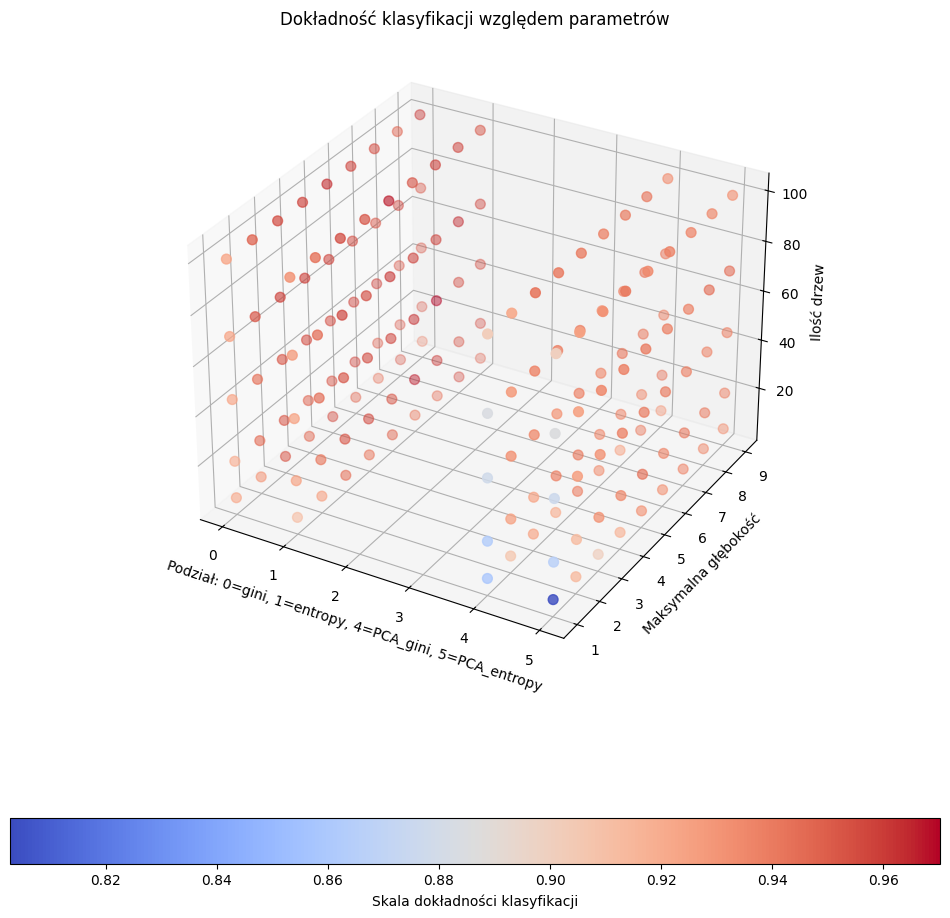

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(data, data_pca, target):
    accuracies = []
    params = []

    comparison = GridSearchCV(
        RandomForestClassifier(),
        {
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 10),
            'min_samples_leaf': [5],
            'n_estimators': [5, 20, 45, 70, 100]
            
        },
        cv=10,
        scoring='accuracy'
    )
    

    comparison.fit(data, target)
    accuracies_no_pca = np.array(comparison.cv_results_['mean_test_score'])
    print(f'Best without PCA: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, n_estimators:{comparison.best_estimator_.n_estimators}, accuracy:{max(comparison.cv_results_['mean_test_score'])}')
    params_no_pca = np.array(list(map(lambda t: [0 if t['criterion'] == 'gini' else 1, t['max_depth'], t['n_estimators']], comparison.cv_results_['params'])))
    

    comparison.fit(data_pca, target)
    accuracies_pca = np.array(comparison.cv_results_['mean_test_score'])
    print(f'Best PCA: Gini/Entropy:{comparison.best_estimator_.criterion}, max_depth:{comparison.best_estimator_.max_depth}, n_estimators:{comparison.best_estimator_.n_estimators}, accuracy:{max(comparison.cv_results_['mean_test_score'])}')
    params_pca = np.array(list(map(lambda t: [4 if t['criterion'] == 'gini' else 5, t['max_depth'], t['n_estimators']], comparison.cv_results_['params'])))

    accuracies = np.concatenate((accuracies_no_pca,accuracies_pca),axis=0)
    params = np.concatenate((params_no_pca,params_pca),axis=0)

    fig = plt.figure(figsize=(12, 12))
    points = fig.add_subplot(111, projection='3d')

    points.scatter(params[:, 0], params[:, 1], params[:, 2], c=accuracies, cmap='coolwarm', s=50)
    points.set_xlabel('Podział: 0=gini, 1=entropy, 4=PCA_gini, 5=PCA_entropy'),
    points.set_ylabel('Maksymalna głębokość')
    points.set_zlabel('Ilość drzew')
    points.set_title('Dokładność klasyfikacji względem parametrów')

    cbar = plt.colorbar(points.collections[0], ax=points, orientation='horizontal')
    cbar.set_label('Skala dokładności klasyfikacji')
    

    plt.show()

plot_comparison(bc_data, bc_pca, bc_target)

Zaczynając od pytania, czy użycie PCA wpływa znacząco na osiągnietę wyniki, odpowiedź brzmi twierdząco. Na diagramie wyraźnie widać, że prawa strona wykresu, która to przedstawia wynik walidacji krzyżowej dla danych z zastosowanym PCA, dostarcza wyraźnie gorsze rezultaty. Rożnica ta opiewa na ok 2,5% procent, i taka też jest dla klasyfikacji o najlepszej dokładności uzyskanej z walidacji krzyżowej dla jednych i drugich danych.

Dalsza analiza zastosowanych wartości dla parametrów będzie się skupiać głównie na danych bez użycia PCA, które to dają lepsze wyniki, jednakże większość z przedstawionych poniżej obserwacji, da się również zaaplikować do rezultatów klasyfikacji danych po zastosowaniu PCA.  

Uruchamiając walidację krzyżową dla danych z *Breast Cancer* można zauważyć następujące zależności:
- Użycie entropii lub gini jako kryterium podziału daje generalnie bardzo zbliżone wyniki i ciężko wybrać zdecydowanie lepszą metodę.
- Maksymalna głębokość drzewa o wartości 7-8 jest optymalna, ale generalnie płytkie drzewa o głebokości 1 dają najgorsze wyniki, które to wraz ze wzrostem głębokości stają się coraz dokładniejsze. Powyżej wartości 8, jakość klasyfikacji ponownie spada.
- Ilość drzew w lesie nie wpływa bardzo znacząco na uzyskaną dokładność klasyfikacji. Najpewniej jest to związane z ich losowym charakterem i dla małej próby badawczej możemy po prostu mieć szczęście przy ich losowaniu. Jest to również połączone z małą ilośią cech zbioru danych - analizowane dane mają tylko 30 cech klasyfikacji, więc i stosunkowo mały las losowy o średniej głębokości potrafi zapewnić ich całkiem niezłe pokrycie.

Dodam jeszcze tylko, że paramtr klasyfikatora dotyczący minimalnej liczby rekordów w liściu został ustawiony na 5, ponieważ taka wartość dawała najlepsze wyniki w punkcie 7.1. Wartość została ustawiona na sztywno dla walidacji krzyżowej, gdyż do tej pory optymalizacja po tym parametrze nie przynosiła znacznych zmian, a dostępne trzy wymiary wykresu byly potrzebne na bardziej istotne parametry.



